# **Árbol de Decisión**

```
Alumno : Pfoccori Quispe Alex Harvey
Codigo: 193837
Proposito : Árbol de Decisión en la clasificación según la pulpa de la papa
```

## **Árbol de Decisión**
Prueba de un árbol de decisión con el dataset de microorganismos.</br>
El criterio para la constrcción del árbol es el de gini con una profundidad considerable.</br>
Se incluye la etapa de test y predicción, así como el cálculo de las métricas respectivas.

## **1. Librerias a utilizar**

In [2]:
# Librerias generales
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import tree

# Librerias para metricas
import sklearn.metrics as metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Librerias para Naive Bayes
from sklearn.tree import DecisionTreeClassifier

## **2. Leer datos**

In [3]:
pixel_num = ['p' + str(i + 1) for i in range(90000)]
pixel_num.append('variedad')

In [4]:
datos = pd.read_csv("./B06_cortes.csv", sep=',', names=pixel_num, skiprows=[0])
# muestras los primero 5 valores
datos.head(10)

,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,...,p89992,p89993,p89994,p89995,p89996,p89997,p89998,p89999,p90000,variedad
0,112,113,115,115,115,112,110,109,112,114,...,120,117,114,114,117,121,119,120,123,S35E01
1,106,103,101,101,101,100,99,99,95,91,...,123,120,117,116,117,117,118,120,121,S35E01
2,87,92,95,96,98,101,99,94,97,96,...,118,119,118,118,120,118,120,121,120,S35E01
3,92,93,95,95,89,80,78,81,82,85,...,118,120,121,121,120,117,119,120,119,S35E01
4,92,88,87,89,92,94,97,99,100,98,...,121,121,119,119,120,121,121,120,120,S35E01
5,104,101,102,107,107,101,95,93,97,98,...,123,126,127,124,120,118,118,118,119,S35E01
6,112,111,110,110,109,108,109,111,115,115,...,107,108,103,99,99,97,96,95,95,S35E01
7,105,103,103,104,104,104,107,111,110,108,...,71,90,103,107,102,108,92,77,73,S35E01
8,101,103,104,105,104,105,107,109,111,108,...,95,97,96,92,92,96,94,102,102,S35E01
9,120,119,116,114,117,116,116,120,122,118,...,117,121,124,121,115,113,115,118,120,S35E01


## **3. Descripcion de datos**

In [5]:
# Información del dataset
datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 623 entries, 0 to 622
Columns: 90001 entries, p1 to variedad
dtypes: int64(90000), object(1)
memory usage: 427.8+ MB


## **4. Distribucion de clases**

In [6]:
# Numero de registros por especie de iris
print(datos.groupby('variedad').size())

variedad
S35E01    35
S35E02    31
S35E03    32
S35E04    32
S35E05    33
S35E06    34
S35E07    26
S35E08    25
S35E09    33
S35E10    30
S36E01    36
S36E02    30
S36E03    31
S36E04    30
S36E05    32
S36E06    33
S36E07    30
S36E08    30
S36E09    30
S36E10    30
dtype: int64


## **5. Separación de datos, para entrenamiento y test**

In [36]:
x = datos.drop(['variedad'], axis = 1)
y = datos['variedad']

# Separa datos en entrenamiento y test
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=5, train_size=0.8)

## **6. Entrenamiento de árbol de decisión**

In [37]:
# Crear el obj árbol de decisión
# HIPERPARAMETRO
#=========
# Indice de impuresa GINI: (criterion)
# Máxima profundidad del árbol: (max_depth)
ArbolDecision = DecisionTreeClassifier(criterion='gini', max_depth=100)

# entrenar el árbol de decision
ArbolDecision.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=100)

## **Test AD**

In [38]:
ArbolDecision.score(x_test, y_test)

0.48

## **7. Gráfica de árbol de decisión**

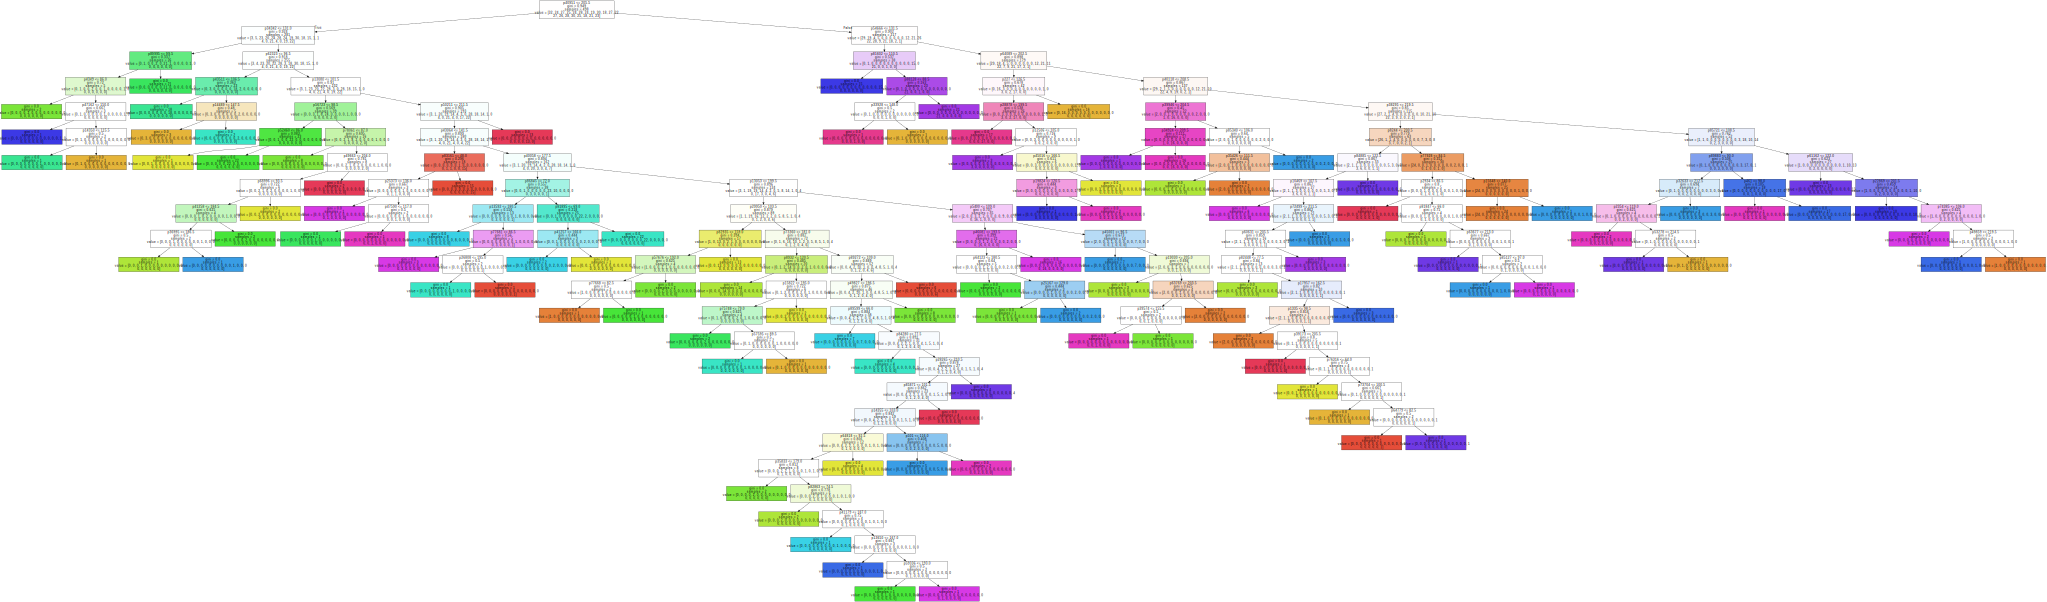

In [39]:
from sklearn.tree import export_graphviz
from graphviz import Source # conda install -c conda-forge python-graphviz
from IPython.display import SVG

graph = Source(export_graphviz(ArbolDecision, feature_names=x.columns, filled=True))
SVG(graph.pipe(format='svg'))

## **8. Test**

In [40]:
pred = ArbolDecision.predict(x_test)
print(pred)
print(y_test)

['S36E08' 'S35E08' 'S35E10' 'S35E10' 'S36E08' 'S35E02' 'S36E08' 'S36E08'
 'S35E08' 'S35E08' 'S36E04' 'S35E04' 'S35E09' 'S35E05' 'S35E03' 'S35E04'
 'S36E01' 'S35E05' 'S35E04' 'S35E10' 'S36E04' 'S35E06' 'S36E05' 'S35E01'
 'S36E03' 'S35E01' 'S35E04' 'S36E06' 'S36E07' 'S36E09' 'S36E02' 'S35E09'
 'S36E09' 'S35E09' 'S36E03' 'S35E01' 'S35E05' 'S36E04' 'S36E06' 'S35E04'
 'S35E03' 'S35E02' 'S36E08' 'S35E10' 'S36E06' 'S36E01' 'S35E02' 'S35E03'
 'S36E01' 'S35E05' 'S36E01' 'S36E07' 'S35E05' 'S36E01' 'S35E02' 'S36E10'
 'S36E09' 'S36E08' 'S35E02' 'S36E08' 'S35E02' 'S35E04' 'S35E10' 'S35E02'
 'S35E06' 'S36E08' 'S35E05' 'S35E07' 'S35E02' 'S36E06' 'S35E05' 'S36E03'
 'S35E04' 'S35E10' 'S36E05' 'S36E08' 'S36E08' 'S35E01' 'S36E03' 'S36E08'
 'S36E07' 'S36E10' 'S35E05' 'S35E05' 'S35E10' 'S35E06' 'S35E10' 'S35E06'
 'S36E09' 'S36E01' 'S36E04' 'S35E01' 'S36E06' 'S36E01' 'S35E06' 'S35E03'
 'S35E04' 'S36E01' 'S35E05' 'S35E05' 'S36E03' 'S35E01' 'S36E02' 'S35E09'
 'S35E06' 'S36E02' 'S36E01' 'S35E03' 'S36E08' 'S36E

In [41]:
x_test.columns

Index(['p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'p7', 'p8', 'p9', 'p10',
       ...
       'p89991', 'p89992', 'p89993', 'p89994', 'p89995', 'p89996', 'p89997',
       'p89998', 'p89999', 'p90000'],
      dtype='object', length=90000)

## **9. Matriz de confusión y métricas**

In [42]:
MatrizConfusion = confusion_matrix(y_test, pred)
Exactitud = metrics.accuracy_score(y_test, pred)

print('Matriz de Confusión')
print(MatrizConfusion)
print('Exactitud = ', Exactitud)

Matriz de Confusión
[[ 1  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  1  0  0  0]
 [ 0  4  0  0  0  0  0  0  0  0  1  2  0  0  0  0  0  0  0  0]
 [ 0  1  2  0  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  2  1  0  0  0  0  0  2  0  0  0  0  0  0  0  2  0]
 [ 0  0  0  0  7  0  0  0  0  0  2  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  2  0  2  0  0  1  0  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  3  0  0  1  0  1  0  0  0  0  0  0  0]
 [ 0  0  2  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  2  0  0  0  0  1  9  0  0  0  0  0  0  0  0  0  0]
 [ 2  0  0  1  0  1  0  0  0  0  2  0  1  0  0  2  0  0  0  0]
 [ 2  0  0  0  0  0  0  0  0  0  0  1  0  2  1  0  1  1  0  0]
 [ 0  1  0  0  0  0  0  0  0  0  0  0  3  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0  1  0  0  2  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  0  0  0  0  0  1  0  1  0  1  0  0  0]
 [ 1  0  0  0  1  0  0  0  0  0  0 

<Axes: >

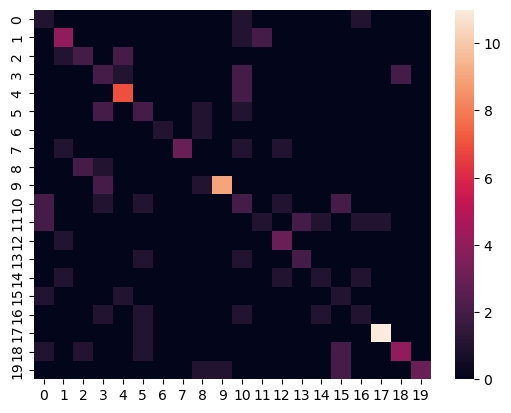

In [43]:
# Mapa de calor
import seaborn as sns
sns.heatmap(MatrizConfusion)

## **10. Prediccion**

In [44]:
import cv2
pixel = []
# Leer nuevo archivo de imagen en escala de grices
image = cv2.imread('./nuevo_corte.jpg', cv2.IMREAD_GRAYSCALE)
# Reescala la imagen a una dimension de 300x300 pixeles
image_rescaled = cv2.resize(image, (300,300), interpolation=cv2.INTER_AREA)
# Obtienen imagen vectorizado y etiquetado
img = np.reshape(image_rescaled, (90000))
pixel.append(img)
# Convierte array de imagenes a dataframe de pandas
nuevo=np.array(pixel)
nuevo

pred = ArbolDecision.predict(nuevo)
pred

c:\Users\HARVEY\anaconda3\envs\machine-learning\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['S35E05'], dtype=object)